### Graphs

- Composed of nodes and edges


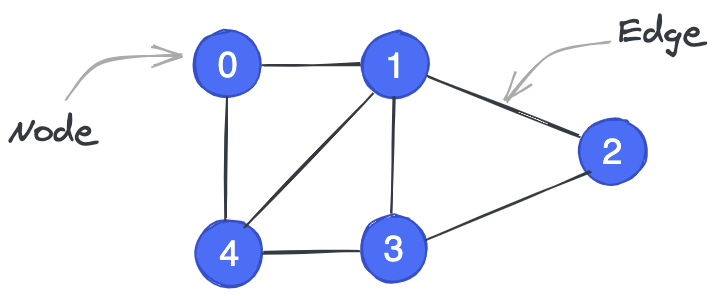

In [1]:
num_nodes = 5
edges = [(0,1),(0,4),(1,2),(1,3),(1,4),(2,3),(3,4)]
len(edges), num_nodes

(7, 5)

- Adjacency list
- A list which shows all the nodes adjacent to a node
- With this list, its easy to traverse the graph and do operations such as searching and finding paths etc
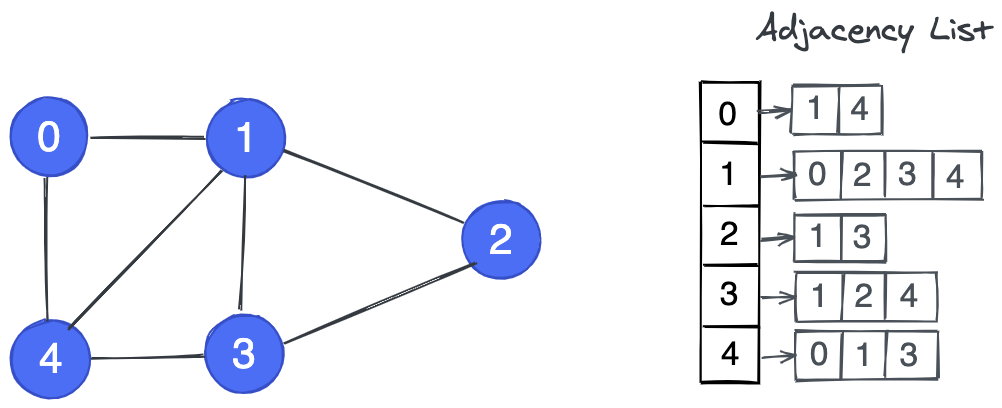

## There are 2 ways you can represent the initial node data

a. Use adjacency Lists
b. Use adjacency Matrix

Both has pros and cons. Following examples we will use list method

In [2]:
num_nodes = 5
edges = [(0,1),(0,4),(1,2),(1,3),(1,4),(2,3),(3,4)]
print(type(edges))


### Creating class for graph

class Graph:
    # What info do we need to create a graph
    def __init__(self,num_nodes,edges):
        self.num_nodes = num_nodes
        self.data = [[] for _ in range(num_nodes)]
        for n1,n2 in edges:
            self.data[n1].append(n2)
            self.data[n2].append(n1)

    # this next 2 fuctions not necessary for the operations of the graph
    # Simply added to make the adjacency list look nice

    def __repr__(self):

        return "\n".join(["{}: {}".format(n,neighbours) for n,neighbours in enumerate(self.data)])
    
    # this is the function that gets internally invoked when you do --> print(graph_1)
    # Normal output is --> <__main__.Graph at 0x1ffb6e38df0>
    # Can change output by editting this function
    
    def __str__(self) -> str:
        return self.__repr__()    


    def add_edge(self,n1,n2):
        
        edges.append((n1,n2))
        self.num_nodes = num_nodes
        self.data = [[] for _ in range(num_nodes)]
        print(self.data)
        for n1,n2 in edges:
            self.data[n1].append(n2)
            self.data[n2].append(n1)
     
        pass

    def remove_edge(self,n1,n2):

        # data within the edges list is of the datatype tuple as its within --> ()
        # therefore, need --> edge_to_remove to be a tuple ie use () instead of []
        # thats because if use [] --> its a list --> and even if the values are equal it will always turn up as false

        edge_to_remove_one = (n1,n2)
        edge_to_remove_two = (n2,n1)

        # added flexibility if the edge value is passed in reverse order
        for edge in edges:
            if edge == edge_to_remove_one or edge == edge_to_remove_two:
                edges.remove(edge)

        self.num_nodes = num_nodes
        self.data = [[] for _ in range(num_nodes)]
        for n1,n2 in edges:
            self.data[n1].append(n2)
            self.data[n2].append(n1)

        pass    
       
            

graph_1 = Graph(num_nodes,edges)
print(graph_1)

graph_1.add_edge(0,3)
print(graph_1)

graph_1.remove_edge(4,1)
print(graph_1)

<class 'list'>
0: [1, 4]
1: [0, 2, 3, 4]
2: [1, 3]
3: [1, 2, 4]
4: [0, 1, 3]
[[], [], [], [], []]
0: [1, 4, 3]
1: [0, 2, 3, 4]
2: [1, 3]
3: [1, 2, 4, 0]
4: [0, 1, 3]
0: [1, 4, 3]
1: [0, 2, 3]
2: [1, 3]
3: [1, 2, 4, 0]
4: [0, 3]


In [3]:
# enumerate function shown
list = [3,6,7]
for x in enumerate(list):
    print(x)

(0, 3)
(1, 6)
(2, 7)


### Implementation of BFS

- Idea is to start at the starting node (arbitary you can decide which is it), then explore all its neighbouring nodes
- ie explore all the nodes in its adjency list, before exploring the nodes at the next depth level,
- ie by choosing one of the nodes from the adjency list and exploring all its neighbours
- Nodes are marked visited or unvisited 
- If neighbouring nodes are unvisited, it will added to the queue, but if its visited, it wont be
- Queues instead of list are used here (both are interchangeable) as queue reduces the time complexity due to the functions associated with it such as deqeueing etc
- Dequeue is removing an element from the front of a list
- Enqueue is adding an element from the back of a list

In [8]:
from collections import deque

class BFS_Graphs:

    def __init__(self,num_nodes,edges):
        
        self.num_nodes = num_nodes
        self.data = [[] for _ in range(num_nodes)]
        for n1,n2 in edges:
            self.data[n1].append(n2)
            self.data[n2].append(n1)
        print(self.data)

    def bfs(self,starting_node):

        # Initialise queue
        queue = deque([starting_node])
        #print(queue)

        # Initialise visited list
        visited = [False]*num_nodes
        #print(visited)
        visited[starting_node] = True # as starting node has been visited

        # Initialise node traversal list
        bfs_traversal = []

        # loop to go through queue and visited listto see which nodes have been visited/unvisited
        # so that traversal operations can be done
        while queue:

            # Deque a node from the front of the list due to the FIFO methodology
            current_node = queue.popleft()
            print(current_node)
            
            # add current node into bfs_traversal list
            bfs_traversal.append(current_node)
            
            # Traverse through adjacency lists to visit the neighbouring nodes
            for neighbouring_nodes in self.data[current_node]:
                if not visited[neighbouring_nodes]:

                    # If never visit adjacency node, visit it and mark visited list
                    visited[neighbouring_nodes] = True
                    # Enque the node
                    queue.append(neighbouring_nodes)
                    print(queue)
        
        return bfs_traversal



num_nodes = 5
edges = [(0,1),(0,4),(1,2),(1,3),(1,4),(2,3),(3,4)]
#3print(type(edges))
bfs_ex = BFS_Graphs(num_nodes,edges)
bfs_ex.bfs(1)
        

[[1, 4], [0, 2, 3, 4], [1, 3], [1, 2, 4], [0, 1, 3]]
1
deque([0])
deque([0, 2])
deque([0, 2, 3])
deque([0, 2, 3, 4])
0
2
3
4


[1, 0, 2, 3, 4]

- Depth First Search

- Instead of travelling to adjacent neighbours first then going to the next level like BFS, this algo goes deep from starting node A --> node A's neighbour, lets ccall it node B --> then exploring node B's neighbour, lets call it node C --> then doing it untill it can traverse as far as possible before backtracking 

- Can code this both iteratively or recursively

In [15]:
class DFS_Graphs:

    def __init__(self,num_nodes,edges):
        
        self.num_nodes = num_nodes
        self.data = [[] for _ in range(num_nodes)]
        for n1,n2 in edges:
            self.data[n1].append(n2)
            self.data[n2].append(n1)
        print(self.data)

    # recursive approach
    def dfs_recursive(self,starting_node,visited):

        # create a list to mark down if node has been visited or not
        visited[starting_node] = True
        print(starting_node)
        
        for neighbouring_node in self.data[starting_node]:
            if not visited[neighbouring_node]:
                
                self.dfs_recursive(neighbouring_node,visited)
                  
        pass


    def dfs_iterative(self,starting_node):

        visited = [False]*self.num_nodes
        dfs_traversal = []
        stack=[starting_node]

        # this syntax implies that while stack is not empty, this loop will run
        while stack:

            current_node = stack.pop()

            if not visited[current_node]:
                visited[current_node] = True
                dfs_traversal.append(current_node)

            for neighbouring_nodes in reversed(self.data[current_node]):
                if not visited[neighbouring_nodes]:
                    stack.append(neighbouring_nodes)

        return dfs_traversal

num_nodes = 5
edges = [(0,1),(0,4),(1,2),(1,3),(1,4),(2,3),(3,4)]
#3print(type(edges))
dfs_ex = DFS_Graphs(num_nodes,edges)

visited = [False]*num_nodes

dfs_ex.dfs_recursive(1,visited)
dfs_ex.dfs_iterative(1)
        

[[1, 4], [0, 2, 3, 4], [1, 3], [1, 2, 4], [0, 1, 3]]
1
0
4
3
2


[1, 0, 4, 3, 2]

- Directed Graphs
- Same as ontop but there is a element of direction in the edges
- The edges are uni-direction 
- ie there is a path from node A to node B, but you cannot go from node B to node A via the same edge
- For example, in maps direction planner, location A and location B might be connected by a one way street, therefore
you can travel from A --> B via that street but not vice versa

### How to represent?

- Using adjacency lists, we can still represent this information
- Using above example of node A and node B, and the edge is from A --> B, in the list, under Node A we will see Node B's input but under Node B we wont see Node A's input

ie: The adjacency list will look


- Node A : {B,C,W,Q}
- Node B : {E,K,P}
- Node M : {A,B}

This shows us that there is a path from A --> B, but not B --> A. There is a path from M --> A or B but not the other way around

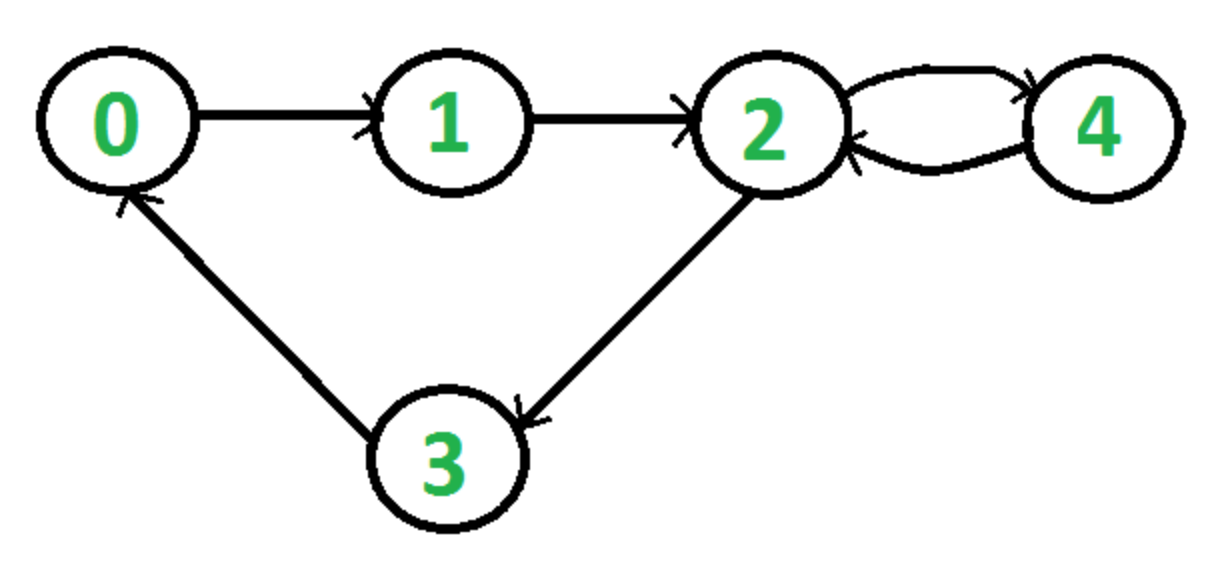

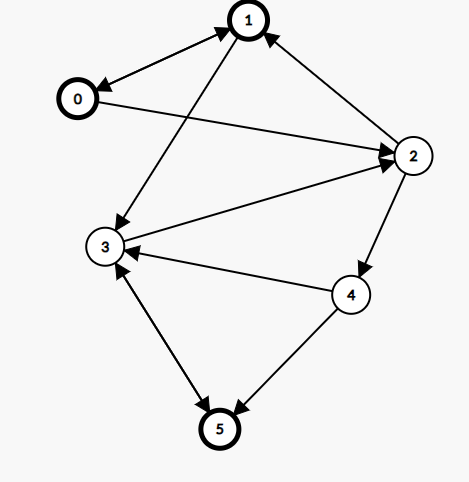

In [41]:
from collections import deque

class Directed_graphs:

    def __init__(self,num_nodes,directed_edges):

        # This method is essentially used to build the adjacency list
        self.num_nodes = num_nodes
        self.data = [[] for _ in range(num_nodes)]
        for n1,n2 in directed_edges:
            # this is the only difference in how you build adjacency list for directed graphs
            self.data[n1].append(n2)
            

        print(self.data)

    def detect_cycle_bfs(self,starting_node,ending_node):

        # Initialise queue
        queue = deque([starting_node])
        #print(queue)

        # Initialise visited list
        visited = [False]*self.num_nodes
        #print(visited)
        visited[starting_node] = True # as starting node has been visited

        # Initialise node traversal list
        bfs_traversal = []

        # loop to go through queue and visited listto see which nodes have been visited/unvisited
        # so that traversal operations can be done
        while queue:

            # Deque a node from the front of the list due to the FIFO methodology
            current_node = queue.popleft()
                        
            # add current node into bfs_traversal list
            bfs_traversal.append(current_node)
            
            # Traverse through adjacency lists to visit the neighbouring nodes
            for neighbouring_nodes in self.data[current_node]:
                if not visited[neighbouring_nodes]:

                    # checks to see if the node being reached is the ending node
                    # If it is, a path has been found to it and the function can break
                    if neighbouring_nodes == ending_node:

                        bfs_traversal.append(neighbouring_nodes)
                        return bfs_traversal

                    else:    
                        
                        # If never visit adjacency node, visit it and mark visited list
                        visited[neighbouring_nodes] = True
                        # Enque the node
                        queue.append(neighbouring_nodes)
                        
                      
        # If function has not broken above then no path available        
        final_stmt = "Sorry no path from Node {} to Node {}".format(starting_node,ending_node)
        
        return final_stmt    

    def detect_cycle_dfs(self,starting_node,ending_node):

        visited = [False]*self.num_nodes
        dfs_traversal = []
        stack=[starting_node]

        # this syntax implies that while stack is not empty, this loop will run
        while stack:

            current_node = stack.pop()

            if not visited[current_node]:
                visited[current_node] = True
                dfs_traversal.append(current_node)

            for neighbouring_nodes in reversed(self.data[current_node]):
                
                if not visited[neighbouring_nodes]:

                    if neighbouring_nodes == ending_node:
                        dfs_traversal.append(neighbouring_nodes)
                        return dfs_traversal
                    
                    else:
                        stack.append(neighbouring_nodes)

        # If function has not broken above then no path available        
        final_stmt = "Sorry no path from Node {} to Node {}".format(starting_node,ending_node)
        
        return final_stmt
        




num_nodes = 6

# As opposed to the above examples, there will be more edges, as this representation of edges show that there is a direction from
# first element to the second one, but not necessarily vice-versa. To show that, you will have to indicate in a new entry
# How you build the class will be the same though
directed_edges = [(0,1),(0,2),(1,0),(1,3),(2,1),(2,4),(3,2),(3,5),(4,3),(4,5),(5,3)]

directed_graph = Directed_graphs(num_nodes,directed_edges)
print(directed_graph.detect_cycle_bfs(1,5))
print(directed_graph.detect_cycle_dfs(1,5))




[[1, 2], [0, 3], [1, 4], [2, 5], [3, 5], [3]]
[1, 0, 3, 5]
[1, 0, 2, 4, 5]


## Weighted Graphs

- Edges have a weight associated with it
- Edges can have a direction associated with it
- Ie adjacency list will show [ node A: (node B,3),(node E,1),(node G,10) ] 

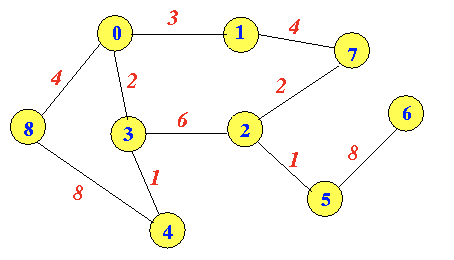

In [57]:
import numpy as np

class Weighted_graphs:

    def __init__(self,num_nodes,edges) -> None:
        self.num_nodes = num_nodes
        self.data = [[] for _ in range(num_nodes)]
        #self.data = np.zeros((num_nodes, 2))
        for n1,n2,weight in edges:
            
            self.data[n1].append((n2, weight))
            self.data[n2].append((n1, weight)) 

        print(self.data)


num_nodes = 9
# Format is --> (node 1,node 2,weight)
edges = [(0,1,3),(1,7,4),(2,3,6),(2,5,1),(2,7,2),(3,4,1),(3,0,2),(4,8,8),(5,6,8),(8,0,4)]
weighted_graph = Weighted_graphs(num_nodes,edges)



[[(1, 3), (3, 2), (8, 4)], [(0, 3), (7, 4)], [(3, 6), (5, 1), (7, 2)], [(2, 6), (4, 1), (0, 2)], [(3, 1), (8, 8)], [(2, 1), (6, 8)], [(5, 8)], [(1, 4), (2, 2)], [(4, 8), (0, 4)]]


### Dijkstra Algorithm

- Its an algorithm to find the shortest path from one node to another, in a weighted graph
- DFS and BFS might not necessarily give you the shortest path
- This can be used in google maps etc where --> nodes represent different cities and the edges are viable routes between 2 cities and the weights represent the distance/time of travel etc

- watch to understand: https://www.youtube.com/watch?v=bZkzH5x0SKU


In [49]:
import heapq

class Weighted_graph:

    def __init__(self,num_nodes,edges) -> None:
        self.num_nodes = num_nodes
        self.data = [[] for _ in range(num_nodes)]
        for n1,n2,weight in edges:
            self.data[n1].append((n2, weight))
            self.data[n2].append((n1, weight)) 

        #print(self.data)

    def  dijkstra(self,starting_node,ending_node):

        # ditance and node
        priority_queue = [(0,starting_node)]

        distance = {node : float('inf') for node in range(num_nodes) }
        distance[starting_node] = 0

        previous_node = {node : None for node in range(num_nodes) }
        
        while priority_queue:

            current_distance,current_node = heapq.heappop(priority_queue)

            if current_node == ending_node:
                break
            if current_distance > distance[current_node]:
                continue

            for neighbouring_node,weight in self.data[current_node]:

                accumulated_distance = weight + current_distance

                if accumulated_distance < distance[neighbouring_node]:
                    
                    distance[neighbouring_node] = accumulated_distance

                    previous_node[neighbouring_node] = current_node

                    #print(priority_queue)
                    heapq.heappush(priority_queue,(accumulated_distance,neighbouring_node))

       
        path = []
        current_node = ending_node

        while current_node is not None:
            path.append(current_node)
            current_node = previous_node[current_node]        
        
        path.reverse()
                
        return path,distance[ending_node]


num_nodes = 6
weighted_edges = [(0, 1, 4), (0, 2, 2), (1, 2, 5), (1, 3, 10), (2, 4, 3), (4, 3, 4), (3, 5, 11)]

dij_ex = Weighted_graph(num_nodes,weighted_edges)
print(dij_ex.dijkstra(0,5))

([0, 2, 4, 3, 5], 20)


In [36]:
import heapq

def dijkstra(graph, start, target):
    # create a queue to start like in BFS
    priority_queue = [(0, start)]
    
    # Create a dictionary that can be updated with the distance to reach a node
    # If node has not been visited yet, it will be considered to be infinite at the beginning
    distances = {node: float('inf') for node in graph}
    distances[start] = 0
    
    # Create a dictionary list to update the previous node from which the current node was reached from
    # Before visiting a node, its 'previous_nodes' entry will be None
    previous_nodes = {node: None for node in graph}
    
    while priority_queue:
        
        # A heap is a specialised tree data structure which is either a min-heap or a max-heap
        # In a min-heap, the child nodes are always lesser than the parent node (vice versa for max heap)
        # 2 different heap functions are seen below
        # a) heappop --> removes and returns the smallest element in the heap --> just right for our use case as we are looking for shortest distances
        # b) heappush --> adds elements to the heap whilst still maintaining heap property
        current_distance, current_node = heapq.heappop(priority_queue)
        
        # if hit the node we are looking for can stop program
        if current_node == target:
            break
        
        # There will always be 2 distances too compare 
        if current_distance > distances[current_node]:
            continue
        
        # we are going through all the neighbours of the the current node, like in BFS and recording the neighbours and respective weights
        for neighbor, weight in graph[current_node]:
            
            # distance calculated will be accumulative of the the distance travelled (current_distance) --> which is the accumulation of all the previous weights
            # plus the weight of getting from current node to neighbouring node
            distance = current_distance + weight
            
            # the distance calculated ontop will be compared with the distance value that is stored already at the neighbouring node
            # this is too see which is the shortest path and accept that path
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                
                # see this new relationship is accepted due to it being the shortest path for the particular neighbouring node --> current node will
                # be considered as its previous ndoe
                previous_nodes[neighbor] = current_node

                # final step is to push the distance (which is the shortest accumulated distance so far) and the neighbouring node into the heap to 
                # be evaluated at the top of this while loop, since this is the node's neighbours we next need to explore as it has the shortest accumulated
                # distance amongst its other neighbouring nodes
                heapq.heappush(priority_queue, (distance, neighbor))
    


    # Reconstruct the shortest path from start to target
    path = []
    current_node = target
    while current_node is not None:
        path.append(current_node)
        current_node = previous_nodes[current_node]
    
    path.reverse()  # Reverse the path to get it from start to target
    
    return path, distances[target]

# Example usage:
graph = {
    'A': [('B', 1), ('C', 4)],
    'B': [('A', 1), ('C', 2), ('D', 5)],
    'C': [('A', 4), ('B', 2), ('D', 1)],
    'D': [('B', 5), ('C', 1)],
}

start_node = 'A'
target_node = 'D'
path, distance = dijkstra(graph, start_node, target_node)
print(f"Shortest path from {start_node} to {target_node}: {path}")
print(f"Distance: {distance}")

Shortest path from A to D: ['A', 'B', 'C', 'D']
Distance: 4
